#### Milestone 2 #####

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json


Load dataframes into proper format

In [76]:
df_plot = pd.read_csv("data/MovieSummaries/plot_summaries.txt", sep='\t', header=None, names=["wikiID", "plot"])
df_meta = pd.read_csv("data/MovieSummaries/movie.metadata.tsv", sep='\t', header=None, names=["wikiID", "freeID", "name", "release_date", "revenue", "runtime", "languages", "countries", "genres"])
df_char = pd.read_csv("data/MovieSummaries/character.metadata.tsv", sep='\t',header=None, names=["WikiID","freeID","release_date","char_name","actor_DOB","actor_gender","actor_height","actor_ethnicity","actor_name","Actor_age","freeID_char_map", "FreeID_char", "FreeID_actor"])
df_char_names = pd.read_csv('data/MovieSummaries/name.clusters.txt', sep="\t", header=None, names=["char_name","freeID_char_map"])

In [77]:
from pandas.io.json import json_normalize

df_tropes = pd.read_csv('data/MovieSummaries/tvtropes.clusters.txt', sep='\t', header=None, names=["trope","details"])
#flatten json column into panda dataframe:
df_tropes = df_tropes.join(json_normalize(df_tropes["details"].map(json.loads).tolist())).drop(["details"], axis=1).rename(columns={"id":"freeID_char_map"})

C:\Users\YGrebici\AppData\Local\Temp\ipykernel_17132\100173281.py:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  df_tropes = df_tropes.join(json_normalize(df_tropes["details"].map(json.loads).tolist())).drop(["details"], axis=1).rename(columns={"id":"freeID_char_map"})


In [78]:
df_tropes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   trope            501 non-null    object
 1   char             501 non-null    object
 2   movie            501 non-null    object
 3   freeID_char_map  501 non-null    object
 4   actor            501 non-null    object
dtypes: object(5)
memory usage: 19.7+ KB


In [79]:
df_meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81741 entries, 0 to 81740
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   wikiID        81741 non-null  int64  
 1   freeID        81741 non-null  object 
 2   name          81741 non-null  object 
 3   release_date  74839 non-null  object 
 4   revenue       8401 non-null   float64
 5   runtime       61291 non-null  float64
 6   languages     81741 non-null  object 
 7   countries     81741 non-null  object 
 8   genres        81741 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 5.6+ MB


In [80]:
df_plot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42303 entries, 0 to 42302
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   wikiID  42303 non-null  int64 
 1   plot    42303 non-null  object
dtypes: int64(1), object(1)
memory usage: 661.1+ KB


In [103]:
df_char.head(5)

,WikiID,freeID,release_date,char_name,actor_DOB,actor_gender,actor_height,actor_ethnicity,actor_name,Actor_age,freeID_char_map,FreeID_char,FreeID_actor
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg


In [82]:
df_tropes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   trope            501 non-null    object
 1   char             501 non-null    object
 2   movie            501 non-null    object
 3   freeID_char_map  501 non-null    object
 4   actor            501 non-null    object
dtypes: object(5)
memory usage: 19.7+ KB


In [83]:
df_char_names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   char_name        2666 non-null   object
 1   freeID_char_map  2666 non-null   object
dtypes: object(2)
memory usage: 41.8+ KB


The feature connecting dataframes together is the Wikipedia ID. Also there are more metadatas of movies (81741 movies) than plots (42303 movies). We will only keep the metadatas of the movies we know the plot of.

In [84]:
df_full = df_meta.merge(df_plot, how='inner', on="wikiID")
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42204 entries, 0 to 42203
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   wikiID        42204 non-null  int64  
 1   freeID        42204 non-null  object 
 2   name          42204 non-null  object 
 3   release_date  39586 non-null  object 
 4   revenue       7587 non-null   float64
 5   runtime       35580 non-null  float64
 6   languages     42204 non-null  object 
 7   countries     42204 non-null  object 
 8   genres        42204 non-null  object 
 9   plot          42204 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 3.5+ MB


Only a small fraction of the characters have been labellised with a trope (500), compared to the number of unlabeled (450669). Here is the dataframe containing the characters with trope

In [111]:
df_inner_char = df_char.merge(df_tropes, how='inner', on='freeID_char_map')

In [112]:
df_inner_char.drop(columns=["char","actor"],inplace=True)
df_inner_char.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 501 entries, 0 to 500
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   WikiID           501 non-null    int64  
 1   freeID           501 non-null    object 
 2   release_date     501 non-null    object 
 3   char_name        501 non-null    object 
 4   actor_DOB        499 non-null    object 
 5   actor_gender     500 non-null    object 
 6   actor_height     469 non-null    float64
 7   actor_ethnicity  333 non-null    object 
 8   actor_name       501 non-null    object 
 9   Actor_age        483 non-null    float64
 10  freeID_char_map  501 non-null    object 
 11  FreeID_char      501 non-null    object 
 12  FreeID_actor     501 non-null    object 
 13  trope            501 non-null    object 
 14  movie            501 non-null    object 
dtypes: float64(2), int64(1), object(12)
memory usage: 62.6+ KB


#### Superficial analysis of datasets #####
* Distribution of number of words in plot description:

In [87]:
#use raw plot_summaries and count nb of words in each plot 
df_plot_copy = df_plot.copy()
df_plot_copy['nb_words']=df_plot_copy['plot'].apply(lambda n: len(n.split()))
df_plot_copy.head(3)


,wikiID,plot,nb_words
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha...",25
1,31186339,The nation of Panem consists of a wealthy Capi...,778
2,20663735,Poovalli Induchoodan is sentenced for six yea...,496


C:\Users\YGrebici\AppData\Local\Temp\ipykernel_17132\3719077297.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


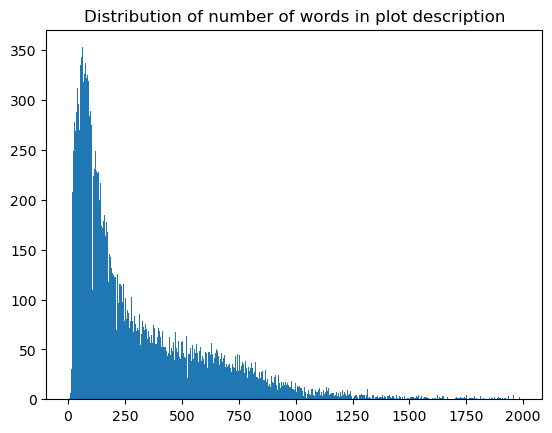

In [110]:
n_bins = 1000

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.hist(df_plot_copy['nb_words'], bins=n_bins)
ax.set_title('Distribution of number of words in plot description')

fig.show()

Only keep the plots with less than 2000 words (which interval?)

In [89]:
threshold = 2000
df_plot_copy = df_plot_copy.loc[df_plot_copy['nb_words'] < threshold]

C:\Users\YGrebici\AppData\Local\Temp\ipykernel_17132\2107044757.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


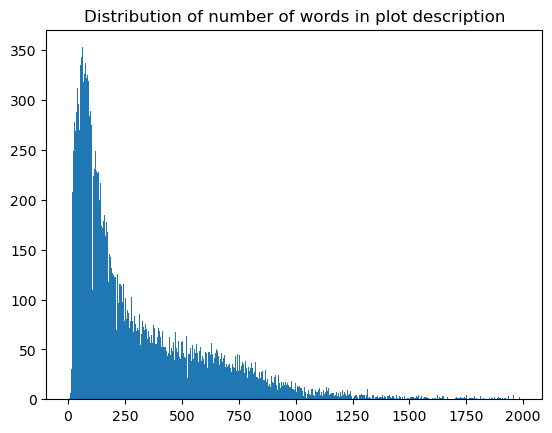

In [109]:
n_bins = 1000

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.hist(df_plot_copy['nb_words'], bins=n_bins)
ax.set_title('Distribution of number of words in plot description')


fig.show()

What would be the minimum number of words to find senseful topic extraction?  

* characters by film distribition: how many characters have been labelised for each film?

In [91]:
df_char_copy = df_char[['freeID','FreeID_actor']].copy()
df_char_copy = df_char_copy.groupby(['freeID']).size().reset_index(name='counts')
df_char_copy.head(5)

,freeID,counts
0,/m/011_mj,9
1,/m/011_p6,5
2,/m/011_zy,4
3,/m/011wtv,18
4,/m/011x_4,20


C:\Users\YGrebici\AppData\Local\Temp\ipykernel_17132\170684536.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


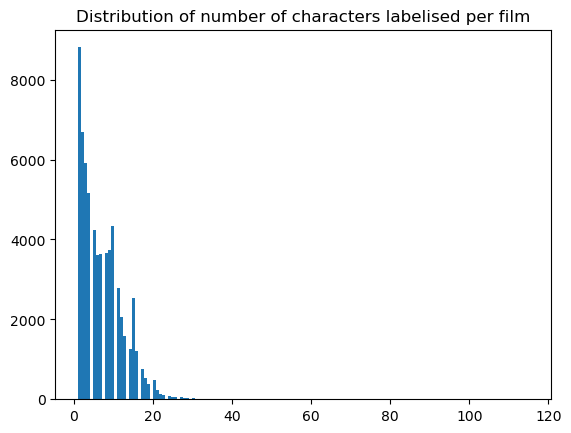

In [108]:
n_bins = 150

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.hist(df_char_copy['counts'], bins=n_bins)
ax.set_title('Distribution of number of characters labelised per film')

fig.show()

1rst quartile, median and 3rd quartile values: 
0.25     3.0
0.50     6.0
0.75    10.0
Name: counts, dtype: float64


C:\Users\YGrebici\AppData\Local\Temp\ipykernel_17132\3851469299.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


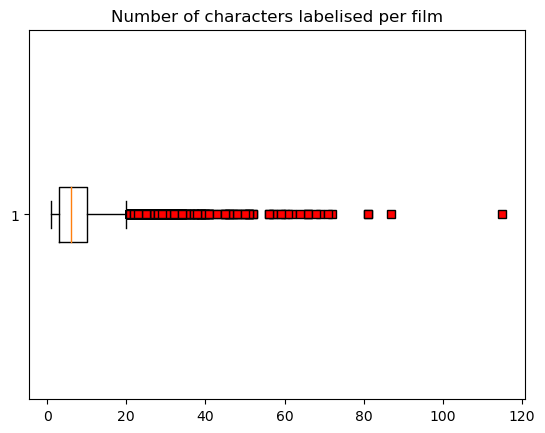

In [106]:
n_bins = 200
red_square = dict(markerfacecolor='r', marker='s')

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
#ax.hist(df_char_copy['counts'], bins=n_bins)
ax.boxplot(df_char_copy['counts'],vert=False, flierprops=red_square)
ax.set_title('Number of characters labelised per film')
fig.show()
print("1rst quartile, median and 3rd quartile values: ")
print(df_char_copy['counts'].quantile([0.25,0.5,0.75]))


"Hemingway & Gellhorn" has more than 115 characters labelised! 

In [105]:
df_char_copy.loc[df_char_copy['counts'] > 100].head(10)

,freeID,counts
46351,/m/0cc8620,115
